# Modelos

Iniciaremos con el modelo base de Regresión Logística (GLM) pero antes __dividiremos entre train y test nuestros datos__.

# Librerías

In [374]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt 
import seaborn as sns 
from scipy import stats as sts 
from sklearn.model_selection import train_test_split 
from sklearn import model_selection
from sklearn import linear_model
import random 
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import pickle

Cargamos el dataset con las modificaciones hechas en el _Featuring Engineering_ :

In [304]:
LOAN_var_norm = pd.read_csv('../data/intermediate/LOAN_var_norm.csv', delimiter =",")
LOAN_var_norm

,"('annual_inc',)","('dti',)","('emp_length',)","('int_rate',)","('loan_amnt',)","('mort_acc',)","('open_acc',)","('pub_rec_bankruptcies',)","('revol_bal',)","('revol_util',)",...,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,term_36,term_60,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,1.601835,-0.157682,0.081610,-1.321041,-0.351811,0.157875,1.502962,2.145481,-0.154017,-1.274923,...,0,0,0,0,0,1,0,1,0,0
1,-0.489987,-1.409073,-0.961618,2.592857,-0.866473,-0.915189,-1.428406,-0.372109,-0.932286,1.921663,...,0,0,0,0,0,1,0,0,1,0
2,0.984698,-0.601169,0.342417,-1.321041,-0.831182,1.230939,1.319751,-0.372109,0.738413,-1.086148,...,0,0,0,0,0,1,0,1,0,0
3,-0.417387,-0.946104,0.342417,0.618016,-0.537090,-0.915189,0.586909,4.663070,-0.509064,-1.388188,...,0,0,0,0,0,0,1,0,1,0
4,0.268369,-0.860157,0.342417,0.618016,-0.066541,-0.378657,-1.428406,-0.372109,-1.177864,1.548308,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442562,-1.756702,0.998595,1.124838,0.521846,-0.351811,-0.915189,-0.512354,-0.372109,0.520341,0.499560,...,0,0,0,0,0,1,0,0,0,1
442563,-0.057731,0.610113,-1.483232,-0.283299,-0.301816,-0.378657,0.220488,-0.372109,0.648895,0.696725,...,0,0,0,0,0,1,0,0,0,1
442564,-1.157084,1.436353,-0.179197,0.611307,-0.184178,-0.915189,-0.512354,2.145481,0.072311,0.344345,...,0,0,0,0,0,0,1,0,0,1
442565,-0.016623,1.011200,-1.222425,1.505912,-0.301816,-0.915189,0.953330,-0.372109,-0.185316,-0.943518,...,0,0,0,0,0,0,1,0,1,0


# Train y Test

Para reducir el coste computacional, hemos ido probando a tirar los modelos con no todos los datos para intentar encontrar un punto a partir del cual los modelos no nos mejoren aún aumentando la cantidad de observaciones. 

Creemos que a más datos mejor, pero que los algoritmos quizás no necesitan tantos datos para obtener buenos resultados, y tirándolos con los más de 400k datos, se nos eternizaba tanto que nunca terminaba de salir, por ejemplo los grids. 

In [337]:
data_train1 = LOAN_var_norm.sample(n=300000, random_state=1234)

In [131]:
data_train1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 271013 to 408815
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ('annual_inc',)                      5000 non-null   float64
 1   ('dti',)                             5000 non-null   float64
 2   ('emp_length',)                      5000 non-null   float64
 3   ('int_rate',)                        5000 non-null   float64
 4   ('loan_amnt',)                       5000 non-null   float64
 5   ('mort_acc',)                        5000 non-null   float64
 6   ('open_acc',)                        5000 non-null   float64
 7   ('pub_rec_bankruptcies',)            5000 non-null   float64
 8   ('revol_bal',)                       5000 non-null   float64
 9   ('revol_util',)                      5000 non-null   float64
 10  ('total_acc',)                       5000 non-null   float64
 11  Charged_off            

In [338]:
Y = data_train1['Charged_off']
X = data_train1.drop(['Charged_off'], axis = 1)


In [133]:
# Vemos que no está 'Charged _off'
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 271013 to 408815
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ('annual_inc',)                      5000 non-null   float64
 1   ('dti',)                             5000 non-null   float64
 2   ('emp_length',)                      5000 non-null   float64
 3   ('int_rate',)                        5000 non-null   float64
 4   ('loan_amnt',)                       5000 non-null   float64
 5   ('mort_acc',)                        5000 non-null   float64
 6   ('open_acc',)                        5000 non-null   float64
 7   ('pub_rec_bankruptcies',)            5000 non-null   float64
 8   ('revol_bal',)                       5000 non-null   float64
 9   ('revol_util',)                      5000 non-null   float64
 10  ('total_acc',)                       5000 non-null   float64
 11  application_type_Indivi

In [134]:
Y.tail()

345139    0
89755     0
275514    0
132653    0
408815    0
Name: Charged_off, dtype: int64

In [339]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [340]:
x_train.shape

(210000, 72)

In [341]:
x_test.shape

(90000, 72)

In [139]:
y_train.head()

6854      0
267129    0
392565    0
338639    0
248225    0
Name: Charged_off, dtype: int64

Hacemos _undersampling_ porque tenemos datos de sobra como para hacer oversampling. Lo que queremos es bajar la clase que tiene más cantidad, a la que tiene menos. 

Haremos undersampling de los datos de nuestra muestra para balancearlos:

In [342]:
undersample = RandomUnderSampler(sampling_strategy = 'majority')

In [343]:
x_under, y_under = undersample.fit_sample(x_train, y_train)

In [344]:
x_under.shape

(92050, 72)

In [345]:
y_under.shape

(92050,)

# Modelo GLM

Elaboramos un modelo GLM, como primera aproximación. 

In [346]:
logit = LogisticRegression(random_state = 1234)

In [347]:
logit.fit(x_under, y_under)

/Users/luzi/opt/anaconda3/envs/loan_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1234)

In [348]:
logit_prob = logit.predict_proba(x_under)

In [349]:
logit_score = logit_prob[:,1]

In [350]:
prediccion_logit = logit.predict(x_test)

In [376]:
conf_matrix = confusion_matrix(y_test, prediccion_logit)

In [351]:
print(conf_matrix)

[[45267 24973]
 [ 6287 13473]]


<AxesSubplot:>

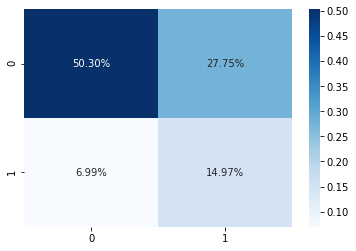

In [377]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

Vemos que los resultados obtenidos con el GLM no son horribles pero si mejorables. 

- Para la gente que clasificó el modelo como pagadores y finalmente pagaron, tenemos un ratio del 50.30%

- Para la gente que clasificó el modelo como no pagadores y finalmente pagaron, tenemos un ratio del 27.75%. ( a esta gente no le dimos el crédito, por tanto, perdimos clientes por hacer una mala predicción)

- Para la gente que clasificó el modelo como pagadores y finalmente no pagaron, tenemos un ratio del 7%, lo cual no es una tasa demasiado alta.  

In [352]:
print(classification_report(y_test, prediccion_logit))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74     70240
           1       0.35      0.68      0.46     19760

    accuracy                           0.65     90000
   macro avg       0.61      0.66      0.60     90000
weighted avg       0.76      0.65      0.68     90000



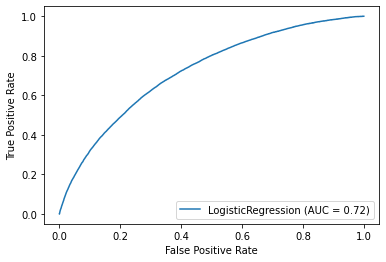

In [353]:
metrics.plot_roc_curve(logit, x_test, y_test)
plt.show()

Obtenemos un accuracy de del 65% y un AUC en la curva ROC del 72%

Guardamos el modelo: 

In [375]:
nombre = 'GLM.sav'
pickle.dump(logit, open(nombre, 'wb'))

# Modelo SVM

In [354]:
SVM = SVC(kernel='rbf',
          tol=0.01, 
          C=1, random_state=1234)

In [356]:
SVM.fit(x_under, y_under)

SVC(C=1, random_state=1234, tol=0.01)

In [357]:
SVM.score(x_under, y_under)

0.6745681694731125

In [358]:
SVM_predicted = SVM.predict(x_test)

In [359]:
SVM.score(x_test, y_test)

0.6399444444444444

In [385]:
conf_matrix = confusion_matrix(y_test, SVM_predicted)

In [386]:
print(confusion_matrix(y_test, SVM_predicted))

[[44052 26188]
 [ 6217 13543]]


<AxesSubplot:>

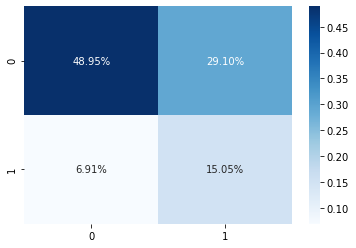

In [387]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

Vemos que los resultados obtenidos con el SVM no son horribles pero si mejorables. 

- Para la gente que clasificó el modelo como pagadores y finalmente pagaron, tenemos un ratio del 49%

- Para la gente que clasificó el modelo como no pagadores y finalmente pagaron, tenemos un ratio del 29%. ( a esta gente no le dimos el crédito, por tanto, perdimos clientes por hacer una mala predicción)

- Para la gente que clasificó el modelo como pagadores y finalmente no pagaron, tenemos un ratio del 7%, lo cual no es una tasa demasiado alta.  

In [361]:
print(classification_report(y_test, SVM_predicted))

              precision    recall  f1-score   support

           0       0.88      0.63      0.73     70240
           1       0.34      0.69      0.46     19760

    accuracy                           0.64     90000
   macro avg       0.61      0.66      0.59     90000
weighted avg       0.76      0.64      0.67     90000



In [ ]:
metrics.plot_roc_curve(SVM, x_test, y_test)
plt.show()

__Vemos que el accuracy no mejora, se mantiene en 0.64, bien sea cogiendo una muestra de 10.000 datos o una de 300.000.__

Además, la precisión de los que pagan es de 0.34, lo cual nos parece bajo 

__Búsqueda Grid__

A continuación se adjuntará el código de la parte realizada con el support vector machine, en la cual se ve reflejada la realización de de la busqueda grid para escoger de una manera correcta los hiper parámetros. 

In [ ]:
# probamos con kernel radial solo y ya nos tarda mucho
# dejamos el gamma por defecto (no lo ponemos)
# metemos 5 en el parametro de regularizacion
# njobs = 3 para usar 3 procesadores
 
param_grid = {'C': [0.1, 10, 100],
              'gamma' : [0.001, 0.0001],
              'kernel': ['rbf']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, n_jobs = 3)
grid.fit(x_under, y_under) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


In [199]:
# para ver cuál es el mejor modelo
print(grid.best_estimator_) 
# SVC(C=10, gamma=0.001)

SVC(C=10, gamma=0.001)


In [249]:
# guardamos el mejor modelo
SVM_Best = grid.best_estimator_

In [367]:
grid_predictions = SVM_Best.predict(x_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75     70240
           1       0.35      0.63      0.45     19760

    accuracy                           0.66     90000
   macro avg       0.61      0.65      0.60     90000
weighted avg       0.75      0.66      0.69     90000



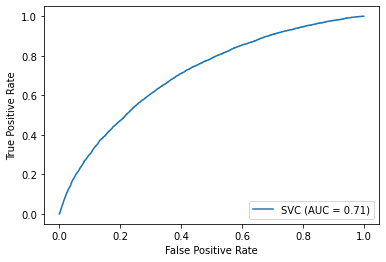

In [325]:
metrics.plot_roc_curve(SVM_Best, x_test, y_test)
plt.show()

Después de hacer el grid hemos obtenido un accuracy ligeramente mayor, del 66%.

Guardamos el modelo:

In [384]:
nombre = 'SupportVM.sav'
pickle.dump(RF, open(nombre, 'wb'))

# Random Forest

In [368]:
RF = RandomForestClassifier(n_estimators = 100 , random_state = 1234, n_jobs = 3)
RF.fit(x_under, y_under)
RF.score(x_under, y_under)
RF_predicted = RF.predict(x_test)
print(classification_report(y_test,RF_predicted))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74     70240
           1       0.34      0.65      0.45     19760

    accuracy                           0.65     90000
   macro avg       0.61      0.65      0.60     90000
weighted avg       0.75      0.65      0.68     90000



In [388]:
conf_matrix = confusion_matrix(y_test, RF_predicted)

In [389]:
print(confusion_matrix(y_test, RF_predicted))

[[45542 24698]
 [ 6886 12874]]


<AxesSubplot:>

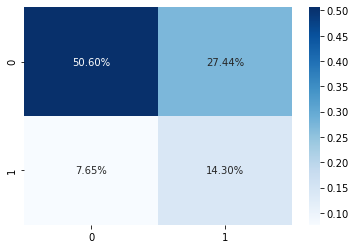

In [390]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

Vemos que los resultados obtenidos con el SVM no son horribles pero si mejorables. 

- Para la gente que clasificó el modelo como pagadores y finalmente pagaron, tenemos un ratio del 51%

- Para la gente que clasificó el modelo como no pagadores y finalmente pagaron, tenemos un ratio del 27.50%. ( a esta gente no le dimos el crédito, por tanto, perdimos clientes por hacer una mala predicción)

- Para la gente que clasificó el modelo como pagadores y finalmente no pagaron, tenemos un ratio del 8%, lo cual no es una tasa demasiado alta.  

In [370]:
coef_RF = pd.DataFrame(RF.feature_importances_)
print(coef_RF)

           0
0   0.082963
1   0.094662
2   0.047253
3   0.103162
4   0.076266
..       ...
67  0.014187
68  0.019167
69  0.009473
70  0.009846
71  0.009291

[72 rows x 1 columns]


Vemos que las últimas variables apenas son importantes.

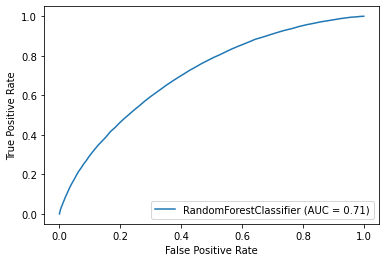

In [371]:
metrics.plot_roc_curve(RF, x_test, y_test)
plt.show()

Con 300.000 datos (teniendo en cuenta que hacemos under sampling), antes del grid obtenemos un accuracy del 65%, igual que con muestras de menos cantidad de datos. 

Guardamos el modelo: 

In [378]:
nombre = 'RandomF.sav'
pickle.dump(RF, open(nombre, 'wb'))

__Búsqueda Grid__

In [372]:
param_grid = {'n_estimators': [500, 1000, 1000]}  
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, n_jobs = 3)
grid.fit(x_under, y_under) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed: 63.0min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'n_estimators': [500, 1000, 1000]}, verbose=3)

In [330]:
print(grid.best_estimator_) 

RandomForestClassifier(n_estimators=1000)


In [331]:
# guardamos el mejor modelo
RF_Best = grid.best_estimator_

In [383]:
grid_predictions = RF_Best.predict(x_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76     70240
           1       0.38      0.73      0.50     19760

    accuracy                           0.68     90000
   macro avg       0.64      0.70      0.63     90000
weighted avg       0.78      0.68      0.70     90000



In [334]:
print(confusion_matrix(y_test, RF_predicted))

[[15290  8135]
 [ 2312  4263]]


Vemos que el modelo no ha mejorado después del grid.

# Gradient Boosting

La _Gradient Boosting_ es un poderoso algoritmo de aprendizaje que utiliza árboles de decisión.

La potenciación es una técnica general de conjunto que consiste en añadir secuencialmente modelos al conjunto donde los modelos posteriores corrigen el rendimiento de los modelos anteriores. 



In [363]:
from sklearn.ensemble import GradientBoostingClassifier

In [364]:
xgb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5 , max_features=2, max_depth = 2, random_state = 1234)
xgb.fit(x_under, y_under)
print("Accuracy score (training): {0:.3f}".format(xgb.score(x_under, y_under)))
print("Accuracy score (validation): {0:.3f}".format(xgb.score(x_test, y_test)))

Accuracy score (training): 0.655
Accuracy score (validation): 0.649


In [380]:
xgb_predicted = xgb.predict(x_test)

In [391]:
conf_matrix = confusion_matrix(y_test, xgb_predicted)

In [392]:
print(confusion_matrix(y_test, xgb_predicted))

[[45723 24517]
 [ 7038 12722]]


<AxesSubplot:>

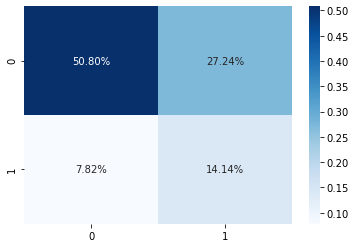

In [393]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

Vemos que los resultados obtenidos con el SVM no son horribles pero si mejorables. 

- Para la gente que clasificó el modelo como pagadores y finalmente pagaron, tenemos un ratio del 51%

- Para la gente que clasificó el modelo como no pagadores y finalmente pagaron, tenemos un ratio del 27.30%. ( a esta gente no le dimos el crédito, por tanto, perdimos clientes por hacer una mala predicción)

- Para la gente que clasificó el modelo como pagadores y finalmente no pagaron, tenemos un ratio del 8%, lo cual no es una tasa demasiado alta.  

In [382]:
print(classification_report(y_test, xgb_predicted))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74     70240
           1       0.34      0.64      0.45     19760

    accuracy                           0.65     90000
   macro avg       0.60      0.65      0.59     90000
weighted avg       0.75      0.65      0.68     90000



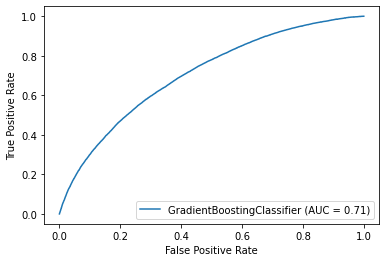

In [365]:
metrics.plot_roc_curve(xgb , x_test, y_test)
plt.show()

Hemos ido probando manualmente a cambiar los parametros y por eso no hemos hecho grid. 

De todas formas, __igual que en todos los modelos, nos sale el mismo accuracy con pocos datos que con prácticamente todos, lo cual no llegamos a entender. Pensamos que no es fallo de los modelos obviamente, sino de como hemos tratado las variables.__


In [379]:
nombre = 'xgboost.sav'
pickle.dump(xgb, open(nombre, 'wb'))

In [ ]:
# Si queremos cargar los modelos: loaded_model = pickle.load(open('xgboost.sav', 'rb'))

### Conclusión

- Hicimos undersampling en lugar de _oversampling_ , ya que consideramos que teníamos datos suficientes. 


- Todos los modelos nos dan el mismo _accuracy_ : 65%.


- Hemos probado con diferentes cantidades de datos, desde 10.000 hasta 300.000, y hemos obtenido el mismo _accuracy_ .


- El mejor modelo, es SVM después del grid, basándonos en el indicador del _accuracy_ , ya que nos da un 66% (la diferencia con el resto es mínima). 


- Elegimos el SVM para predecir el conjunto de test. 


- Pensamos que no hemos conseguido un _accuracy_ mayor por no haber gestionado quizás adecuadamente las variables. 


- Como __next steps__ nos marcamos el volver hacia atrás y modificar algunas variables, pensando qué importancia pueden llegar a tener para nuestro modelo. 